In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def function_2(x) :
    return x[0]**2 + x[1]**2

In [5]:
def function_2(x) :
    if x.ndim == 1:
        return np.sum(x**2)
    else :
        return np.sum(x**2, axis = 0)

In [6]:
x0 = np.arange(-2, 2, 0.25)
x1 = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(x0, x1)

print(X.shape, Y.shape)

(16, 16) (16, 16)


In [7]:
nrows = X.shape[0]
ncols = X.shape[1]

In [29]:
print(nrows, ncols)

16 16


In [8]:
Xf = X.flatten()
Yf = Y.flatten()

arr = np.array([Xf, Yf])
print(Xf.shape, Yf.shape)
print(arr.shape, arr.ndim)

(256,) (256,)
(2, 256) 2


In [10]:
z = function_2(arr)
print(z.shape)

(256,)


In [13]:
z = np.reshape(z, (nrows,ncols))
print(X.shape, Y.shape, z.shape)

(16, 16) (16, 16) (16, 16)


Text(0.5, 0, 'z')

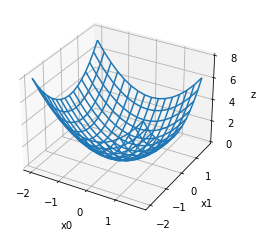

In [14]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, z)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('z')


In [15]:
def numerical_diff_1d(f, x):
    h = 1e-4  # delta value
    return (f(x + h) - f(x - h)) / (2 * h)

In [16]:
def numerical_gradient_single_point(f, x, verbose = False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) 
       
    for idx in range(x.size): 
        v_keep = x[idx]
        
        
        x[idx] = float(v_keep) + h 
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        
        x[idx] = float(v_keep) - h 
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h) 
        x[idx] = v_keep 
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [24]:
numerical_gradient_single_point(function_2, np.array([3.0, 4.0]), verbose = 2)

x.size=2
[3.0001 4.    ] --> 25.00060001
[2.9999 4.    ] --> 24.99940001
grad[0]=6.00000000000378

[3.     4.0001] --> 25.00080001
[3.     3.9999] --> 24.99920001
grad[1]=7.999999999999119



array([6., 8.])

In [28]:
numerical_gradient_single_point(function_2, np.array([5.0, 3.0]), verbose = 1)

x.size=2
[5.0001 3.    ] --> 34.00100001
[4.9999 3.    ] --> 33.99900001
grad[0]=9.999999999976694

[5.     3.0001] --> 34.00060001
[5.     2.9999] --> 33.99940001
grad[1]=5.9999999999860165



array([10.,  6.])

In [19]:
def numerical_gradient(f, X):
    if X.ndim == 1 :
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [20]:
grad = numerical_gradient(function_2, arr )
print(grad.shape)

(2, 256)


In [21]:
X.shape, Y.shape, grad.shape

((16, 16), (16, 16), (2, 256))

In [22]:
print(arr.shape, arr.size, arr.ndim)

(2, 256) 512 2


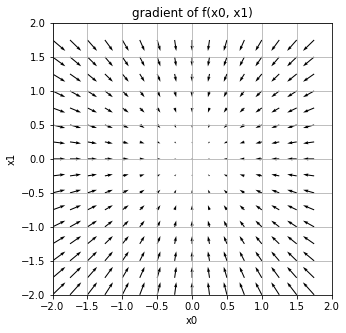

In [23]:
plt.figure(figsize = (5,5))
plt.quiver(X, Y, - grad[0], - grad[1],  angles = "xy")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.title('gradient of f(x0, x1)')
plt.show()